C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

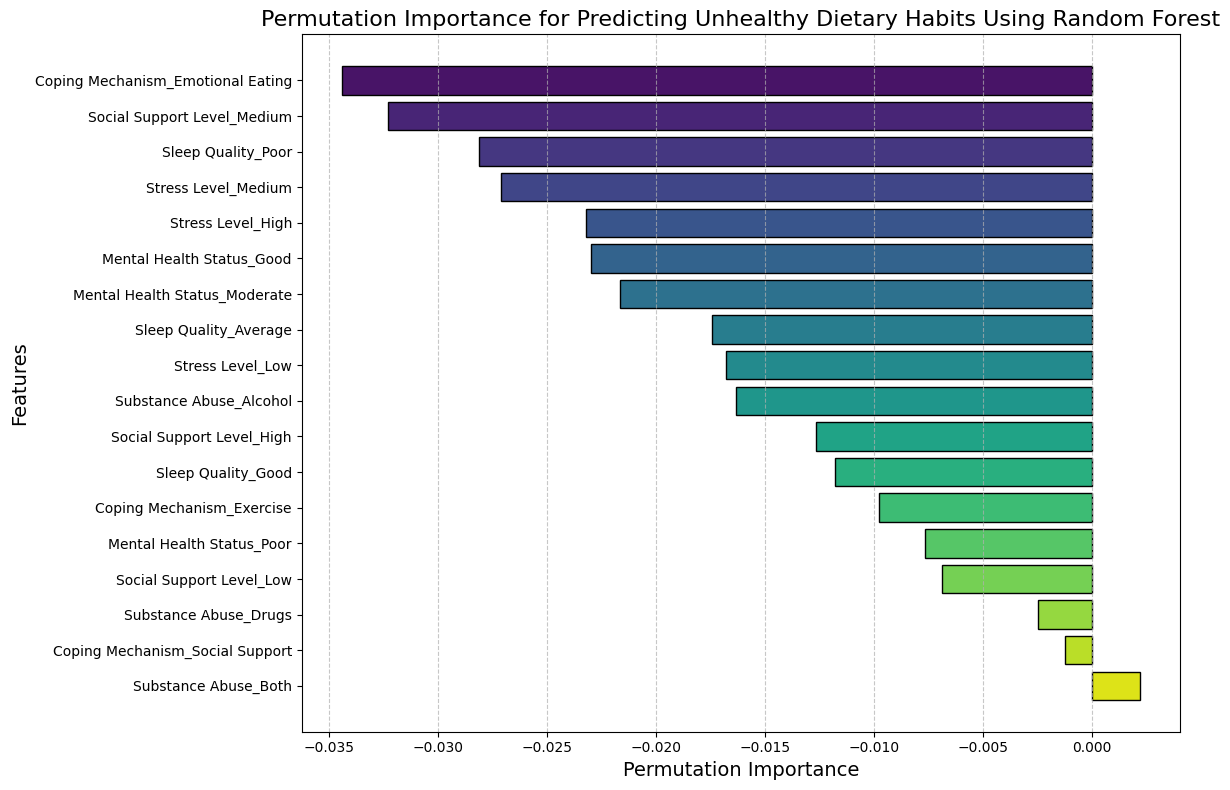

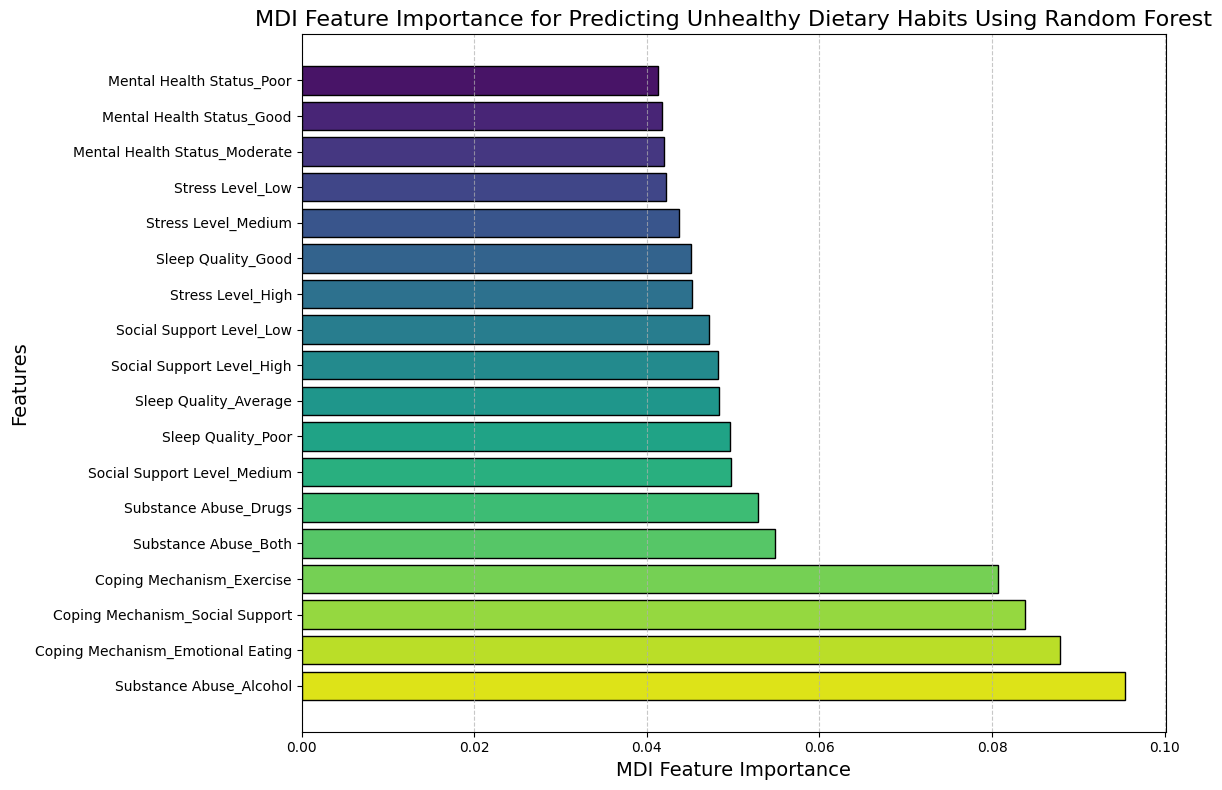

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('South_Texas_Obesity_Rates.csv')

# Select features and target
selected_features = [
    'Stress Level', 'Sleep Quality', 'Substance Abuse', 
    'Mental Health Status', 'Coping Mechanism', 'Social Support Level', 'Dietary Habits'
]
data_selected = data[selected_features]

# One-hot encoding
data_with_dummies = pd.get_dummies(data_selected, columns=[
    'Stress Level', 'Sleep Quality', 'Substance Abuse', 
    'Mental Health Status', 'Coping Mechanism', 'Social Support Level'
])

# Encode target variable
label_encoder = LabelEncoder()
data_with_dummies['Dietary Habits_Unhealthy'] = label_encoder.fit_transform(
    data_with_dummies['Dietary Habits'].apply(lambda x: 1 if x == 'Unhealthy' else 0)
)

# Prepare features and target
X = data_with_dummies.drop(['Dietary Habits', 'Dietary Habits_Unhealthy'], axis=1)
y = data_with_dummies['Dietary Habits_Unhealthy']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Permutation Feature Importance for Random Forest
perm_importance = permutation_importance(random_forest, X_test, y_test, n_repeats=30, random_state=0)
sorted_idx = perm_importance.importances_mean.argsort()

# Define color palette
colors = sns.color_palette('viridis', len(X.columns))

# Sort features by importance
sorted_features = np.array(X.columns)[sorted_idx]
sorted_importances = perm_importance.importances_mean[sorted_idx]

# Plot settings
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances, color=colors, edgecolor='black')
plt.xlabel("Permutation Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Permutation Importance for Predicting Unhealthy Dietary Habits Using Random Forest", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()

# Display plot
plt.show()

# Extracting MDI feature importances
feature_importances = random_forest.feature_importances_

# Sort the features by their importance
sorted_idx = feature_importances.argsort()
sorted_features = np.array(X.columns)[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot settings
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances, color=colors, edgecolor='black')
plt.xlabel("MDI Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("MDI Feature Importance for Predicting Unhealthy Dietary Habits Using Random Forest", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()

# Display plot
plt.show()



C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

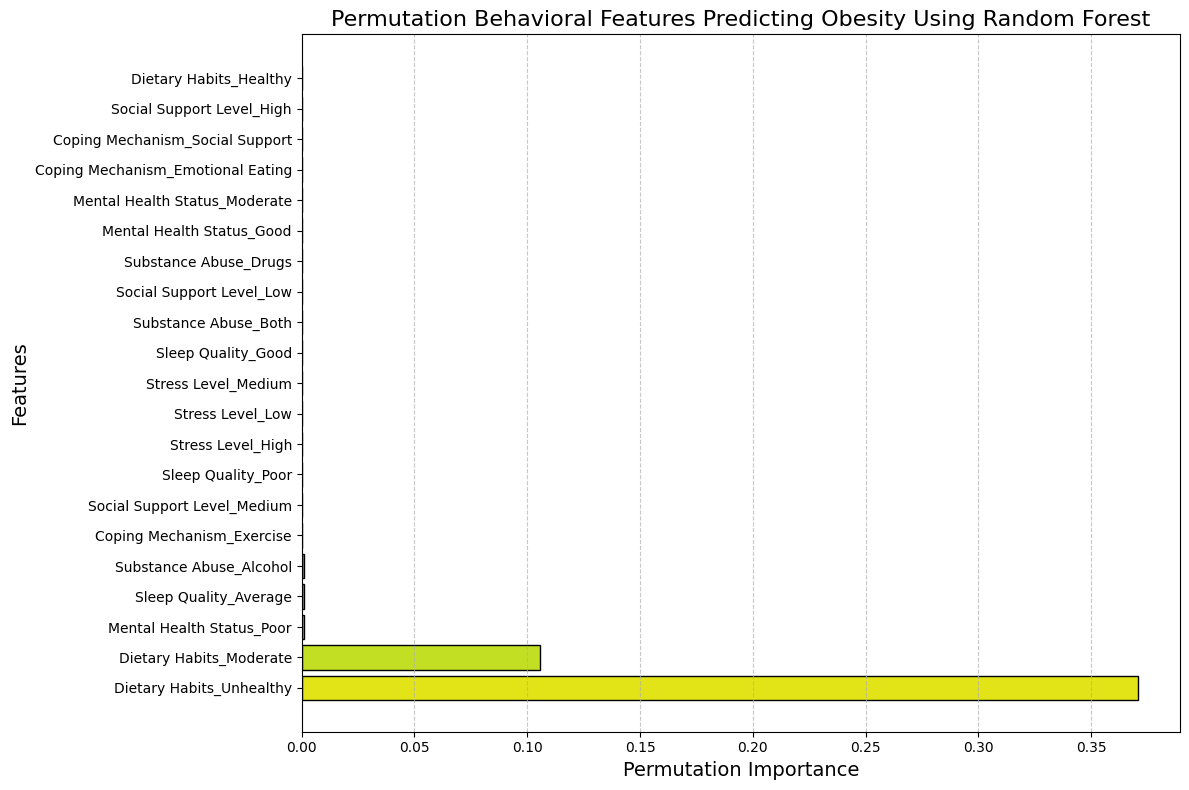

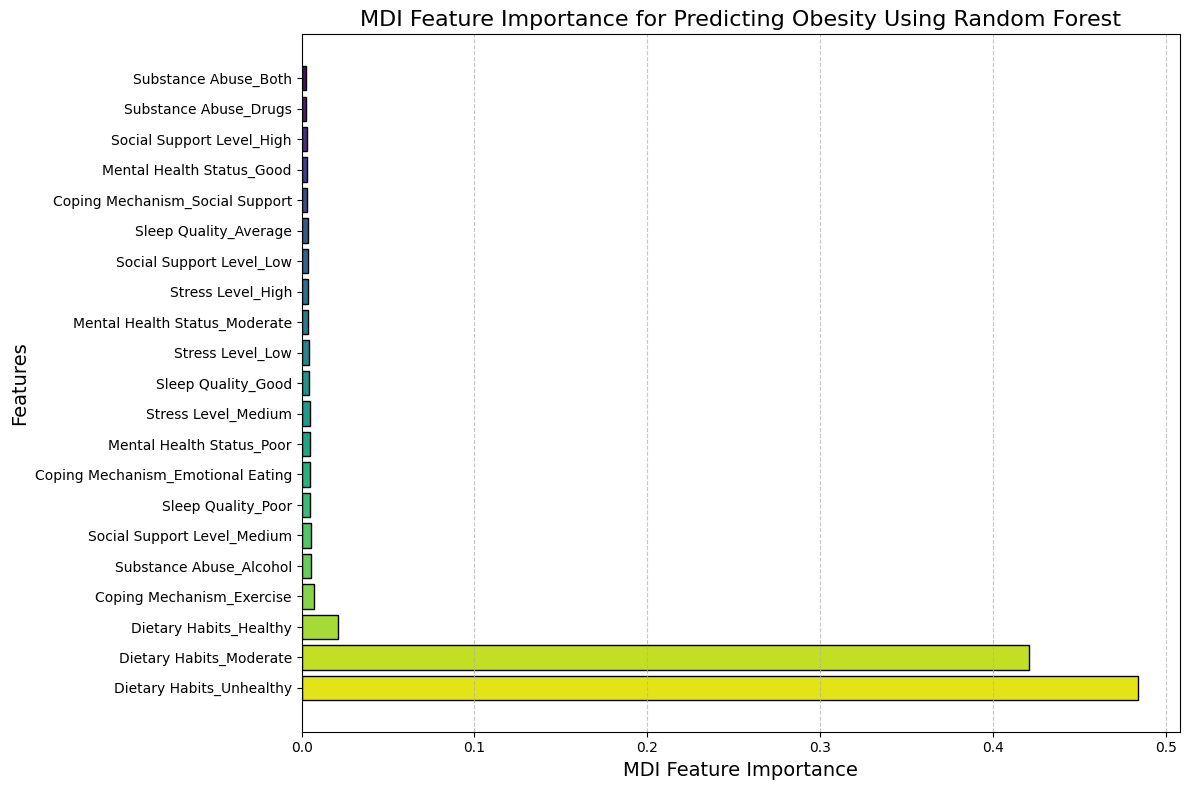

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('South_Texas_Obesity_Rates.csv')

# Select features and target
selected_features = ['Dietary Habits', 'Stress Level', 'Sleep Quality', 'Substance Abuse', 
                     'Mental Health Status', 'Coping Mechanism', 'Social Support Level', 'Obesity']
data_selected = data[selected_features]

# One-hot encoding for categorical variables
data_selected = pd.get_dummies(data_selected, columns=['Dietary Habits', 'Stress Level', 'Sleep Quality', 'Substance Abuse', 
                                                      'Mental Health Status', 'Coping Mechanism', 'Social Support Level'])

# One-hot encoding for target variable 'Obesity'
target_encoder = OneHotEncoder()
y = target_encoder.fit_transform(data_selected[['Obesity']]).toarray()

# Dropping the target variable 'Obesity' from features
X = data_selected.drop('Obesity', axis=1)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Permutation Feature Importance for Random Forest
perm_importance = permutation_importance(random_forest, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# Define color palette
colors = sns.color_palette('viridis', len(X.columns))

# Sort features by importance
sorted_features = np.array(X.columns)[sorted_idx]
sorted_importances = perm_importance.importances_mean[sorted_idx]

# Plot settings
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances, color=colors, edgecolor='black')
plt.xlabel("Permutation Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Permutation Behavioral Features Predicting Obesity Using Random Forest", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()

# Display plot
plt.show()


# Extracting MDI feature importances
feature_importances = random_forest.feature_importances_

# Sort the features by their importance
sorted_idx = feature_importances.argsort()
sorted_features = np.array(X.columns)[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot settings
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances, color=colors, edgecolor='black')
plt.xlabel("MDI Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("MDI Feature Importance for Predicting Obesity Using Random Forest", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()

# Display plot
plt.show()

C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

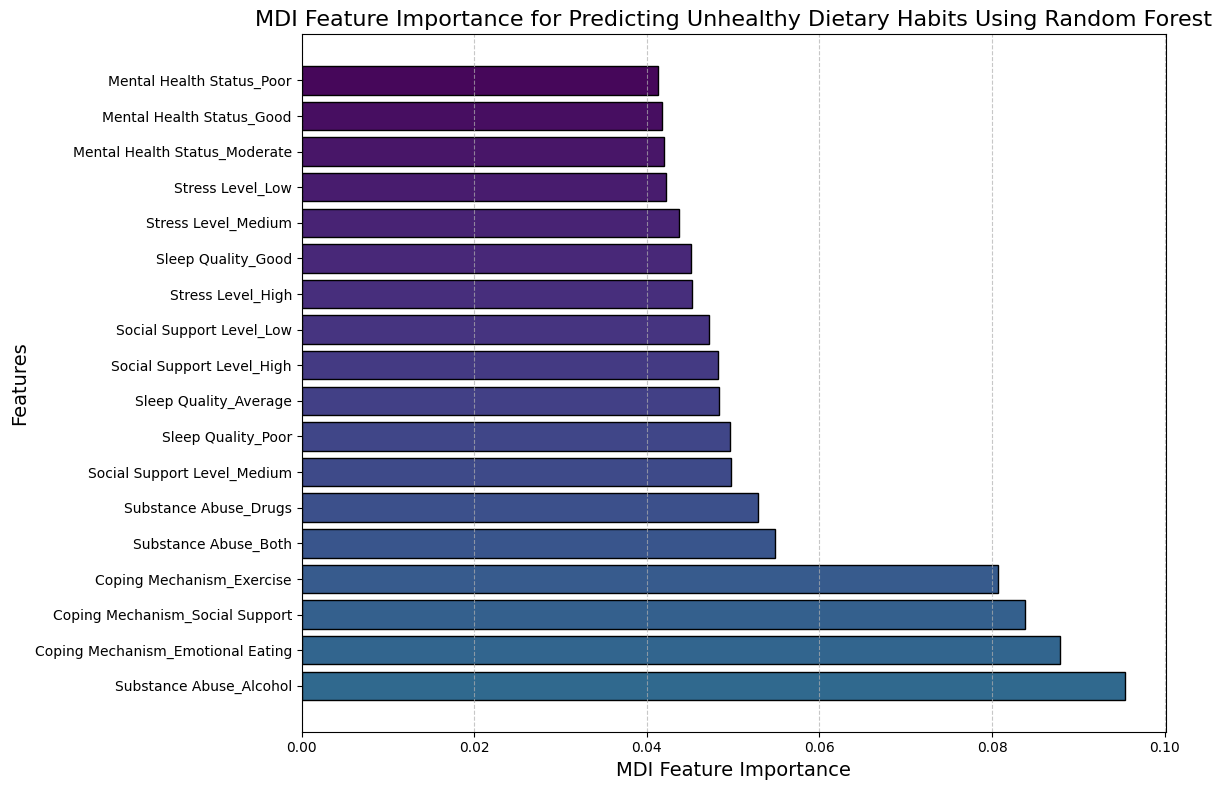

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('South_Texas_Obesity_Rates.csv')

# Select features and target
selected_features = [
    'Stress Level', 'Sleep Quality', 'Substance Abuse', 
    'Mental Health Status', 'Coping Mechanism', 'Social Support Level', 'Dietary Habits'
]
data_selected = data[selected_features]

# One-hot encoding
data_with_dummies = pd.get_dummies(data_selected, columns=[
    'Stress Level', 'Sleep Quality', 'Substance Abuse', 
    'Mental Health Status', 'Coping Mechanism', 'Social Support Level'
])

# Encode target variable
label_encoder = LabelEncoder()
data_with_dummies['Dietary Habits_Unhealthy'] = label_encoder.fit_transform(
    data_with_dummies['Dietary Habits'].apply(lambda x: 1 if x == 'Unhealthy' else 0)
)

# Prepare features and target
X = data_with_dummies.drop(['Dietary Habits', 'Dietary Habits_Unhealthy'], axis=1)
y = data_with_dummies['Dietary Habits_Unhealthy']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Extracting MDI feature importances
feature_importances = random_forest.feature_importances_

# Sort the features by their importance
sorted_idx = feature_importances.argsort()
sorted_features = np.array(X.columns)[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot settings
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances, color=colors, edgecolor='black')
plt.xlabel("MDI Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("MDI Feature Importance for Predicting Unhealthy Dietary Habits Using Random Forest", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()

# Display plot
plt.show()
